## Lab 5: Kaggle Competition

Team FourFeats: Lucia, Carina, Michelle, Shannon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re as re

<b>Read the Data from a CSV file</b>  This code reads the training data into a panda data frame.

In [2]:
training = pd.read_csv('Lab5_train.csv', dtype={'Age': np.float64}) #training is dataframe with training data
test = pd.read_csv('Lab5_test.csv', dtype={'Age': np.float64}) #test is dataframe with test data
full_data = [training, test] #full_data is dataframe with all data
passengerid = test['PassengerID']
passenger_list = test['PassengerID']

#### Feature Engineering

In [3]:
#2. Embarked feature has some missing values. Fill those with the most occuring value ('S)
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (training[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.561798
1        Q  0.366667
2        S  0.341577


In [4]:
#3. Create a family size feature
# https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['ParCh'] + 1
print (training[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.307829
1           2  0.555556
2           3  0.557692
3           4  0.758621
4           5  0.333333
5           6  0.190476
6           7  0.272727
7           8  0.000000
8          11  0.000000


In [5]:
#3.5 Let's also categorize people to check whether they are alone or not
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (training[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.512748
1        1  0.307829


In [6]:
#4. Fare has some missing values. Replace with median. Categorize into 4 ranges. 
#https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(training['Fare'].median())
    training['CategoricalFare'] = pd.qcut(training['Fare'], 4)
print (training[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

     CategoricalFare  Survived
0         [0, 7.896]  0.234043
1    (7.896, 14.454]  0.290749
2   (14.454, 31.275]  0.412281
3  (31.275, 512.329]  0.617778


In [7]:
# #5. Age has lots of missing values. 
# #https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier
for dataset in full_data:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
training['CategoricalAge'] = pd.cut(training['Age'], 5)

print (training[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0    (-0.08, 16]  0.500000
1       (16, 32]  0.361345
2       (32, 48]  0.355102
3       (48, 64]  0.506849
4       (64, 80]  0.222222


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
# # 5.1 Another way to process age
# # http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html

# def fillAges(row):
#     if row['Sex']=='female' and row['Pclass'] == 1:
#         if row['Title'] == 'Miss':
#             return 30
#         elif row['Title'] == 'Mrs':
#             return 45
#         elif row['Title'] == 'Officer':
#             return 49
#         elif row['Title'] == 'Royalty':
#             return 39

#     elif row['Sex']=='female' and row['Pclass'] == 2:
#         if row['Title'] == 'Miss':
#             return 20
#         elif row['Title'] == 'Mrs':
#             return 30

#     elif row['Sex']=='female' and row['Pclass'] == 3:
#         if row['Title'] == 'Miss':
#             return 18
#         elif row['Title'] == 'Mrs':
#             return 31

#     elif row['Sex']=='male' and row['Pclass'] == 1:
#         if row['Title'] == 'Master':
#             return 6
#         elif row['Title'] == 'Mr':
#             return 41.5
#         elif row['Title'] == 'Officer':
#             return 52
#         elif row['Title'] == 'Royalty':
#             return 40

#     elif row['Sex']=='male' and row['Pclass'] == 2:
#         if row['Title'] == 'Master':
#             return 2
#         elif row['Title'] == 'Mr':
#             return 30
#         elif row['Title'] == 'Officer':
#             return 41.5

#     elif row['Sex']=='male' and row['Pclass'] == 3:
#         if row['Title'] == 'Master':
#             return 6
#         elif row['Title'] == 'Mr':
#             return 26

# for dataset in full_data:
#     dataset.Age = dataset.apply(lambda r : fillAges(r) if np.isnan(r['Age']) else r['Age'], axis=1)

# training['CategoricalAge'] = pd.cut(training['Age'], 5)

# print (training[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

In [9]:
#6. Let's get the title of people
#https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
    
print(pd.crosstab(training['Title'], training['Sex']))

Sex       female  male
Title                 
Col            0     3
Countess       1     0
Don            0     1
Dr             1     4
Jonkheer       0     1
Lady           1     0
Major          0     1
Master         0    46
Miss         185     0
Mme            1     0
Mr             0   530
Mrs          133     0
Ms             2     0
Rev            0     5


In [10]:
#6.5 We have titles, let's categorize them and check the impact on survival rate. 
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (training[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.456522
1    Miss  0.700535
2      Mr  0.160377
3     Mrs  0.813433
4    Rare  0.444444


In [11]:
#7. Process cabin

for dataset in full_data:
    dataset.Cabin.fillna('U',inplace=True)
    dataset['Cabin'] = dataset['Cabin'].map(lambda c : c[0])

print (training[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean())

  Cabin  Survived
0     A  0.600000
1     B  0.784314
2     C  0.615385
3     D  0.696970
4     E  0.764706
5     F  0.769231
6     G  0.500000
7     T  0.000000
8     U  0.291845


<b>Data Cleaning</b> 

In [12]:
#https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4
    
    # Mapping Cabin
    dataset.loc[ dataset['Cabin'] == 'A', 'Cabin']  			       = 0
    dataset.loc[ dataset['Cabin'] == 'B', 'Cabin']  			       = 1
    dataset.loc[ dataset['Cabin'] == 'C', 'Cabin']  			       = 2
    dataset.loc[ dataset['Cabin'] == 'D', 'Cabin']  			       = 3
    dataset.loc[ dataset['Cabin'] == 'E', 'Cabin']  			       = 4
    dataset.loc[ dataset['Cabin'] == 'F', 'Cabin']  			       = 5
    dataset.loc[ dataset['Cabin'] == 'G', 'Cabin']  			       = 6
    dataset.loc[ dataset['Cabin'] == 'T', 'Cabin']  			       = 7
    dataset.loc[ dataset['Cabin'] == 'U', 'Cabin']  			       = 8
    dataset['Cabin'] = dataset['Cabin'].astype(int)
    
    # Mapping Women and Children
    dataset['Women_child'] = 0
    dataset.loc[((dataset['Age'] > 0) & (dataset['Sex'] == 0)) | (dataset['Age'] == 0), 'Women_child'] = 1
    dataset['Women_child'] = dataset['Women_child'].astype(int)

# Feature Selection
drop_elements = ['PassengerID', 'Name', 'Ticket', 'SibSp',\
                 'ParCh']
training = training.drop(drop_elements, axis = 1)
training = training.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (training.head(10))

train = training.values
test  = test.values

   Survived  Pclass  Sex  Age  Fare  Cabin  Embarked  FamilySize  IsAlone  \
0         0       3    1    2     0      8         1           1        1   
1         0       2    1    2     2      8         0           2        0   
2         0       3    1    1     0      8         0           1        1   
3         0       2    0    3     1      4         0           1        1   
4         0       3    0    1     0      8         0           1        1   
5         0       3    1    1     0      8         2           1        1   
6         0       3    1    1     2      8         0           1        1   
7         0       3    1    2     1      8         0           3        0   
8         1       2    0    2     2      8         0           4        0   
9         0       3    1    1     1      8         0           1        1   

   Title  Women_child  
0      1            0  
1      1            0  
2      1            0  
3      3            1  
4      2            1  
5      1

<b>Initial Classifier Comparison</b> 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns   #probs need to pip install seaborn
import xgboost

from sklearn.model_selection import StratifiedShuffleSplit, KFold
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold

import plotly as py
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


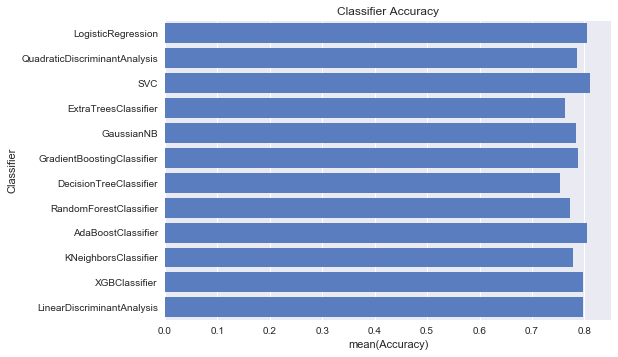

In [14]:
#https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    xgboost.XGBClassifier(),
    ExtraTreesClassifier(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc


for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

<b>Output our results for the test set with SVC</b> 

In [15]:
candidate_classifier = SVC()
candidate_classifier.fit(train[0::, 1::], train[0::, 0])
result = candidate_classifier.predict(test)

In [16]:
passengerid[:5]

0     11
1    824
2    695
3    507
4    685
Name: PassengerID, dtype: int64

In [17]:
len(result) #good! they're expecting 394 for each submission, have to add header

394

In [18]:
final_data = {'PassengerID': passengerid, 'Survived': result}
predicted_categories = pd.DataFrame(data = final_data)
predicted_categories.to_csv('test_out.csv' , index = False)

In [19]:
candidate_classifier = LogisticRegression()
candidate_classifier.fit(train[0::, 1::], train[0::, 0])
result = candidate_classifier.predict(test)

<b>Tune Parameters</b> 

In [20]:
from sklearn.pipeline import Pipeline

#### Commenting out the optimization part since it takes a long time and we have the optimal parameters already (can be found below)

In [21]:
# # Optimizing Logistic Regression
# from sklearn.model_selection import GridSearchCV
# clf = Pipeline([('LogisticRegression', LogisticRegression(max_iter=400))])

# parameters = {
#                 #'LogisticRegression__penalty': ('l1','l2'),
#                 'LogisticRegression__C': (2 ** -3, 2 ** -2, 2 ** -1, 2 ** 0, 2 ** 1, 2 ** 2, 2 ** 3, 2 ** 4),
#                 'LogisticRegression__solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag')  #1
#  }
# gs_clf = GridSearchCV(clf, parameters, n_jobs=-1)
# gs_clf = gs_clf.fit(train[0::, 1::], train[0::, 0])
# predicted = gs_clf.predict(test)
# # accuracy_score(dev_set.Category, predicted)

# print("Best score: %0.3f" % gs_clf.best_score_)
# print("Best parameters set:")
# best_parameters = gs_clf.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#    print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [22]:
# # Optimizing SVC
# from sklearn.model_selection import GridSearchCV
# clf = Pipeline([('SVC', SVC(probability=True, kernel = 'rbf'))])

# parameters = {
#                 'SVC__C': (2 ** -3, 2 ** -2, 2 ** -1, 2 ** 0, 2 ** 1, 2 ** 2, 2 ** 3, 2 ** 4),  #1
#                 'SVC__decision_function_shape': ('ovo', 'ovr', 'None'),
#                 #'SVC__kernel': ('rbf', 'poly'), #'linear', 'poly'
#                 'SVC__gamma': (2** -7, 2** -6, 2** -5, 2** -4, 2** -3, 2** -2, 2** -1, 2** 0, 2** 1, 2** 2, 2** 3, 2** 4, 2** 5, 2** 6, 2** 7 )
#  }
# gs_clf = GridSearchCV(clf, parameters, n_jobs=-1)
# gs_clf = gs_clf.fit(train[0::, 1::], train[0::, 0])
# predicted = gs_clf.predict(test)
# # accuracy_score(dev_set.Category, predicted)

# print("Best score: %0.3f" % gs_clf.best_score_)
# print("Best parameters set:")
# best_parameters = gs_clf.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#    print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [23]:
# # Optimize Linear Discriminant Analysis

# clf = Pipeline([('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis())])

# parameters = {
#                 'LinearDiscriminantAnalysis__solver': ('svd','lsqr','eigen')}  #1

# gs_clf = GridSearchCV(clf, parameters, n_jobs=-1)
# gs_clf = gs_clf.fit(train[0::, 1::], train[0::, 0])
# predicted = gs_clf.predict(test)
# # accuracy_score(dev_set.Category, predicted)

# print("Best score: %0.3f" % gs_clf.best_score_)
# print("Best parameters set:")
# best_parameters = gs_clf.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#    print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [25]:
# # Optimizing Adaboost
# from sklearn.model_selection import GridSearchCV
# clf = Pipeline([('AdaBoostClassifier', AdaBoostClassifier())])
# parameters = {
#                 #'LogisticRegression__penalty': ('l1','l2'),
#                 'AdaBoostClassifier__learning_rate': (0.25, 0.5, 0.75),
#                 'AdaBoostClassifier__n_estimators': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550)
# #                 'LogisticRegression__C': (2 ** -3, 2 ** -2, 2 ** -1, 2 ** 0, 2 ** 1, 2 ** 2, 2 ** 3, 2 ** 4),
# #                 'LogisticRegression__solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag')  #1
#  }
# gs_clf = GridSearchCV(clf, parameters, n_jobs=-1)
# gs_clf = gs_clf.fit(train[0::, 1::], train[0::, 0])
# predicted = gs_clf.predict(test)
# # accuracy_score(dev_set.Category, predicted)
# print("Best score: %0.3f" % gs_clf.best_score_)
# print("Best parameters set:")
# best_parameters = gs_clf.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#    print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [26]:
candidate_classifier = SVC(C = 1, gamma = 0.03125, kernel = 'rbf', decision_function_shape = 'ovo')
candidate_classifier.fit(train[0::, 1::], train[0::, 0])
result = candidate_classifier.predict(test)

In [27]:
final_data = {'PassengerID': passengerid, 'Survived': result}
predicted_categories = pd.DataFrame(data = final_data)

# output without ensembling:
# predicted_categories.to_csv('test_7.csv' , index = False)

#### Ensemble method

We used the same framework outlined in this website using the best models from our previous analysis:
https://www.kaggle.com/arthurtok/titanic/introduction-to-ensembling-stacking-in-python

In [28]:
# https://www.kaggle.com/arthurtok/titanic/introduction-to-ensembling-stacking-in-python

from scipy.optimize import minimize

def mix(x):
    n_methods = len(classifiers)
    y_mix = [np.multiply(x[i], y_[i]) for i in range(n_methods)]
    y_mix = np.sum(y_mix, axis=0)
    y_mix = np.array([round(y).astype(int) for y in y_mix])
    acc = accuracy_score(y_test, y_mix)
    return -acc

In [29]:
# https://www.kaggle.com/arthurtok/titanic/introduction-to-ensembling-stacking-in-python

# Some useful parameters which will come in handy later on
ntrain = training.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
#kf = KFold(n_splits= NFOLDS, random_state=SEED)
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
        
#     def feature_imp(self,x,y):
#         print(self.clf.fit(x,y).)

In [30]:
# https://www.kaggle.com/arthurtok/titanic/introduction-to-ensembling-stacking-in-python

def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [31]:
# Put in our parameters for said classifiers

# Logistic parameters
lg_params = {
    'C': 0.5,
    'solver': 'liblinear'
}


# LinearDiscriminantAnalysis parameters
lda_params = {
    'solver': 'svd'
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 50,
    'learning_rate' : 0.25
}


# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'rbf',
    'C' : 1, 
    'gamma' : 0.03125, 
    'decision_function_shape' : 'ovo'
}

In [32]:
# Create 4 objects that represent our 4 models
lg = SklearnHelper(clf=LogisticRegression, seed=SEED, params=lg_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)
# lda = SklearnHelper(clf=LinearDiscriminantAnalysis, seed=SEED, params=lda_params)
#cannot get LDA to work -- not including it in the ensemble model anymore

In [33]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = training['Survived'].ravel()
train = training.drop(['Survived'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test # Creats an array of the test data

In [34]:
# Create our OOF train and test predictions. These base results will be used as new features

ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier
lg_oof_train, lg_oof_test = get_oof(lg, x_train, y_train, x_test) # Logistic Regresion 
# lda_oof_train, lda_oof_test = get_oof(lda,x_train, y_train, x_test) # Linear Discriminant Analysis

print("Training is complete")

Training is complete


In [35]:
lg = LogisticRegression(C=0.5, solver='liblinear')
lg.fit(x_train,y_train).coef_

array([[-0.46922184, -1.20728759, -0.23266437,  0.20922092, -0.14708945,
         0.11872573, -0.37117348, -0.20703255,  0.40770348,  1.18618318]])

In [36]:
ada_feature = ada.feature_importances(x_train, y_train)

[ 0.14  0.04  0.18  0.06  0.12  0.02  0.16  0.    0.16  0.12]


In [37]:
# svc_feature = svc.feature_importances(x_train,y_train) -- too many features to plot

In [38]:
lg_feature = [-0.48764476, -1.0898199,  -0.2371944,   0.2102665,  -0.14545518,  0.11431281,
              -0.38205732, -0.20223201,  0.39227969,  1.35330996]
ada_feature = [0.12,  0.04,  0.18,  0.08,  0.12,  0.02,  0.18,  0, 0.14,  0.12]

In [39]:
cols = train.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols, 'Logistic Regression feature importances': lg_feature,
                                   'AdaBoost feature importances': ada_feature})

In [40]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Scatter plot Logistic
trace = go.Scatter(
    y = feature_dataframe['Logistic Regression feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['Logistic Regression feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Logistic Regression feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Logistic Regression Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
iplot(fig,filename='scatter2010') 

# Scatter plot AdaBoost
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
iplot(fig,filename='scatter2010')

In [41]:
# Create the new column containing the average of values

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

,AdaBoost feature importances,Logistic Regression feature importances,features,mean
0,0.12,-0.487645,Pclass,-0.183822
1,0.04,-1.089820,Sex,-0.524910
2,0.18,-0.237194,Age,-0.028597


In [42]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='bar-direct-labels')

In [43]:
base_predictions_train = pd.DataFrame( {'LogisticRegression': lg_oof_train.ravel(), 'AdaBoost': ada_oof_train.ravel()
    })
base_predictions_train.head()

,AdaBoost,LogisticRegression
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0


In [44]:
x_train = np.concatenate(( lg_oof_train, ada_oof_train, svc_oof_train), axis=1)
x_test = np.concatenate(( lg_oof_test, ada_oof_test, svc_oof_test), axis=1)

In [45]:
gbm = xgboost.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

In [46]:
gbm.score(x_train,y_train)

0.82513661202185795

In [47]:
# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'PassengerID': passengerid,
                            'Survived': predictions })
StackingSubmission.to_csv("test_v10.csv", index=False)

<b>Reference Materials</b> 

In [48]:
# # Data manipulation (only on training so far)

# # 1. Make Pclass three separate dummy variables 
# classes = pd.get_dummies(training.Pclass, prefix = 'Class')
# classes.columns = ['First Class', 'Second Class', 'Third Class']
# training = pd.concat([training,classes], axis = 1)
# Passenger_class = training['Pclass']
# del training['Pclass']
# cols = training.columns.tolist()
# cols = ['PassengerID','Survived','First Class','Second Class','Third Class','Name','Sex','Age','SibSp','ParCh','Ticket','Fare','Cabin','Embarked']
# training = training[cols]

# # 2. Make Sex a dummy variable 
# sex = pd.get_dummies(training['Sex'])
# male = sex['male']
# del sex['male']
# training = pd.concat([training,sex], axis = 1)
# cols = training.columns.tolist()
# cols = ['PassengerID','Survived', 'First Class','Second Class','Third Class','Name', 'female', 'Age', 'SibSp', 'ParCh', 'Ticket', 'Fare', 'Cabin', 'Embarked']
# training = training[cols]

# # 3. Make embarking ports dummy variables. First, though fill NA with most common value, S
# for dataset in full_data:
#     dataset['Embarked'] = dataset['Embarked'].fillna('S')
# print (training[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

# port = pd.get_dummies(training['Embarked'])
# port.columns = ['Cherbourg', 'Queenstown', 'Southampton']
# embarked = training['Embarked']
# del training['Embarked']
# training = pd.concat([training,port], axis = 1)
# training.head()

<b>Later Strategy</b> 

We discovered the use of Pipelines as a way to support trying out the performance of various feature selection options as well as parameters for various classifiers. Much of this strategy came from the discussion of linear and SV models from lecture as well as the Scikit-Learn website http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
We both tried various parameters for classifiers, relying on GridSearch, and below displays our code and results. Due to the computational load of doing a GridSearch (combinatorial growth), we both experimented with parameters on our separate machines in order to develop the best algorithm quicker.

1. Feature Selection attempted:
    1. Families vs siblings
2. Classifiers used:
    1. Linear: Naive Bayes, Linear Regression, Stochastic Gradiant Descent
    2. SVC and Linear SVC (One vs One, One vs Many)

<b>Pipeline Template</b> 

In [49]:
#Pipeline attempts (the uncommented are the final parameters for his best classifier) 
# #derived from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
# text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2), tokenizer=LemmaTokenizer(), max_df=0.25,token_pattern=r'\b\w+\b', stop_words="english")),
#                       ('tfidf', TfidfTransformer(use_idf=True,norm='l2')),
#                       #('clf', SVC(C=1000000.0, gamma='auto', kernel='rbf'))])
#                       # ('clf', LinearSVC(C=1.0, random_state=69, penalty='l2', dual=True, tol=1e-5))])
#                       #('clf', OneVsOneClassifier(LinearSVC(random_state=0)))])                    
#                       ('clf', SGDClassifier(loss='hinge', alpha=1e-5, penalty='elasticnet', n_iter=50, random_state=69))])
# _ = text_clf.fit(train_set["Review Text"], train_set.Category)
# predicted = text_clf.predict(dev_set["Review Text"])
# accuracy_score(dev_set.Category, predicted)